In [1]:
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

### Load the data

In [2]:
from data_helpers import load_data, preprocess_data

path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


### Plot the number of ratings per movie and user

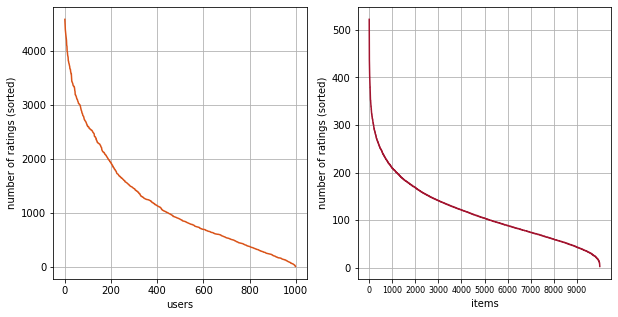

min # of items per user = 8, min # of users per item = 3.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

In [4]:
def split_data(ratings, p_test=0.1):
    """split the ratings to training data and test data.
    """
    # set seed
    np.random.seed(988) 
    
    # init
    num_rows, num_cols = ratings.shape
    train = sp.lil_matrix((num_rows, num_cols))
    test = sp.lil_matrix((num_rows, num_cols))
    
    print("the shape of original ratings. (# of row, # of col): {}".format(ratings.shape))

    nz_items, nz_users = ratings.nonzero() #return the indices of the elements that are non-zero
    
    # split the data
    for user in set(nz_users): #pour chaque colonne(user), on choisit p_test(10%) de lignes(movies) pour le test set,  les lignes restantes étant pour le train set
        # randomly select a subset of ratings
        row, col = ratings[:, user].nonzero()
        selects = np.random.choice(row, size=int(len(row) * p_test)) #generates a random sample from a given 1-D array
        residual = list(set(row) - set(selects))

        # add to train set
        for res in residual:
            train[res, user] = ratings[res, user]

        # add to test set
        for sel in selects:
            test[sel, user] = ratings[sel, user]
    
    print("Total number of nonzero elements in original data:{v}".format(v=ratings.nnz)) #number of stored values, including explicit zeros
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return train, test

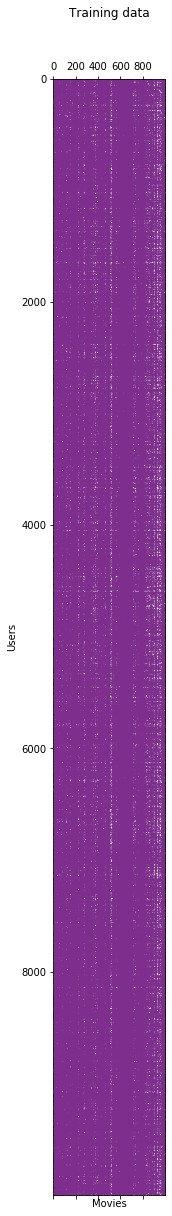

In [5]:
from plots import plot_train_test_data

plot_train_test_data(ratings)



### Ratings that have to be predicted (items and users specified in sample_submission file)

In [6]:
from data_helpers import read_csv_sample

INPUT_PATH = "../data/sample_submission.csv"
ids = read_csv_sample(INPUT_PATH)

### Implement baselines

#### Use the global mean to do the prediction

In [8]:
from proj2_helpers import baseline_global_mean


train, test = split_data(ratings, p_test=0.1)
rmse, predictions = baseline_global_mean(train, test, ids)
print("test RMSE of baseline using the global mean: {v}.".format(v=rmse))

the shape of original ratings. (# of row, # of col): (10000, 1000)
Total number of nonzero elements in original data:1176952
Total number of nonzero elements in train data:1065327
Total number of nonzero elements in test data:111625
test RMSE of baseline using the global mean: [[1.12105013]].


#### Use the user means to do the prediction

In [9]:
from proj2_helpers import baseline_user_mean

rmse, predictions = baseline_user_mean(train, test, ids)
print("test RMSE of the baseline using the user mean: {v}.".format(v=rmse))

test RMSE of the baseline using the user mean: [[1.0963385]].


#### Use the item means to do the prediction

In [10]:
from proj2_helpers import baseline_item_mean

rmse, predictions = baseline_item_mean(train, test, ids)
print("test RMSE of the baseline using the item mean: {v}.".format(v=rmse))

test RMSE of the baseline using the item mean: [[1.03302947]].


### Save output for submission

In [47]:
from data_helpers import create_csv_submission

OUTPUT_PATH = "../data/submission.csv"
create_csv_submission(ids, predictions, OUTPUT_PATH)
print("File submission.csv ready to be submitted !")

File submission.csv ready to be submitted !
